# Project: Investigate a Dataset :  No-show Appointments
* Dataset: <a href='https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000'> No-show appointments </a>

* Original data source from <a href='https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000'> Kaggle </a>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> ‘ScheduledDay’ tells us on what day the patient set up their appointment.

> ‘Neighborhood’ indicates the location of the hospital.

> ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program **Bolsa Família**.

> 'No-show' gives the attendance, ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they didn't show up.


    
**Questions**
* What percentage of patients missed their appointment

* What is the relationship between illnesses and No Show?

* Could the age of a patient be a factor for missing his/her appointment?

* Did patients miss their scheduled appointment due to not being enrolled in the Brazillian Welfare Program?

* Did patients miss their appointment due to not recieving an SMS?

* Could the date of appointment be a cause for patients missing their appointment and how does it corelate with age groups?

* What's the relationship between age groups and other features?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') 

# Analysing Data
#dropping not needed columns
df = df.drop(['PatientId','AppointmentID'], axis =1) # ----> These columns aren't needed for the analysis because they dont affect our results in any way.

# checking for duplicates
print(sum(df.duplicated())) #---> 635 duplicates

# checking for missing/ null values
df.info() # -- > no missing values

df.shape # --- > (110527, 12)



635
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


(110527, 12)


### Data Cleaning 
* Remove duplicates
* The ScheduledDay and AppointmentDay columns have letters in their data therefore needs to be cleaned;
* These columns are actually the same so, i'll remove the AppointmentDay column;
* Rename the column No-show to No_show;
* Rename Handcap to Handicap;
* Rename Hipertension to Hypertension.

In [3]:
# removing duplicates
df.drop_duplicates(inplace=True) 

# cleaning columns
col = ['ScheduledDay' , 'AppointmentDay']
for c in col:
    df[c] = df[c].apply(lambda x: x[:10])
    
#removing AppointmentDay column
df.drop('AppointmentDay',axis =1 , inplace=True)

#renaming columns
df = df.rename(columns= {'No-show': 'No_show',
                          'Handcap': 'Handicap',
                            'Hipertension': 'Hypertension'})


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : What percentage of patients missed their appointments?

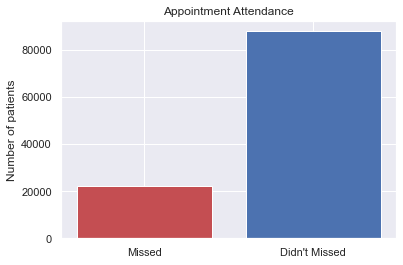

20.11

In [28]:
#sorting data 
missed = df.query("'Yes' in No_show")
n_missed = df.query("'No' in No_show")

#Dropping No_show columns
missed.drop('No_show', axis=1, inplace=True)
n_missed.drop('No_show', axis=1, inplace=True)

#plot function

def plot(x, y ,x_label, y_label, title, colors):
    plt.bar(x,y, color = colors )
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
#plot
colors=['r', 'b']
plot(['Missed', "Didn't Missed"], [missed.shape[0], n_missed.shape[0]], None, 'Number of patients','Appointment Attendance' , colors)


perc_missed = np.round(((missed.shape[0]/df.shape[0])* 100) , 2)
perc_missed

**Insight**
> About 20.11% of patients missed their appointment , i will check the proportions of male to female next.

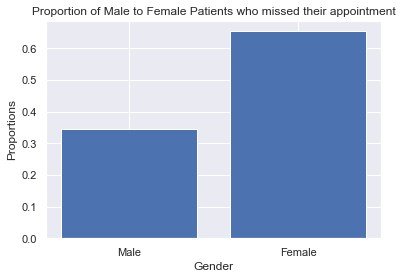

0.3459 0.6541



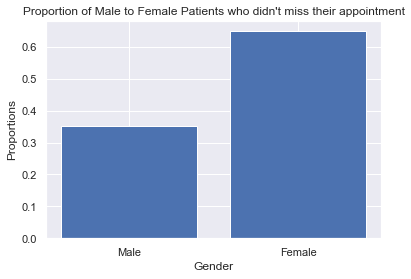

0.3512 0.6488


In [5]:
# Missed 
male_missed = missed[missed['Gender'] == 'M']
male_count = male_missed.shape[0] / missed.shape[0]

female_missed = missed[missed['Gender'] == 'F']
female_count = female_missed.shape[0] / missed.shape[0]

#Didn't Missed
male_n_missed = n_missed[n_missed['Gender'] == 'M']
male_n_count = male_n_missed.shape[0] / n_missed.shape[0]

female_n_missed = n_missed[n_missed['Gender'] == 'F']
female_n_count = female_n_missed.shape[0] / n_missed.shape[0]


# bar plots
plt.subplot(1,1,1)
plot(["Male", 'Female'],[male_count, female_count],'Gender', 'Proportions', 'Proportion of Male to Female Patients who missed their appointment', None )
print(np.round(male_count ,4), np.round(female_count, 4)) #--> use np.round() to set proportion values to 4 d.p

print() # -- > for space

plot(["Male", 'Female'],[male_n_count, female_n_count],'Gender', 'Proportions', "Proportion of Male to Female Patients who didn't miss their appointment", None )
print(np.round(male_n_count ,4), np.round(female_n_count, 4))

**Insight**
> The number of female patients are more than that of the male patients.

> The females were the most to miss as well as attend their appointment.

> Both cases are in the ratio 1:2  *Male:Female*

### Research Question 2  : What is the relationship between illnesses and No Show?

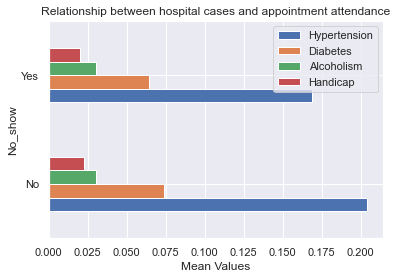

In [6]:
# group by No-show and get the mean values  
ill_noshow = df[['Hypertension', 'Diabetes' ,'Alcoholism' ,'Handicap' , 'No_show']]
ill_noshow = ill_noshow.groupby('No_show').mean()

#plot
ill_noshow.plot(kind='barh')
plt.xlabel('Mean Values')
plt.title('Relationship between hospital cases and appointment attendance')
plt.show()

**Insight**

> The plot shows that most patients had cases of Hypertension.

> It shows that the proportion of patients who missed to the patients who didn't is roughly the same in every case (illnesses).

### Research Question 3 : Could the age of a patient be a factor for missing his/her appointment?

> I'll compare the ages of those who were absent based on the 75th percentile of the distribution

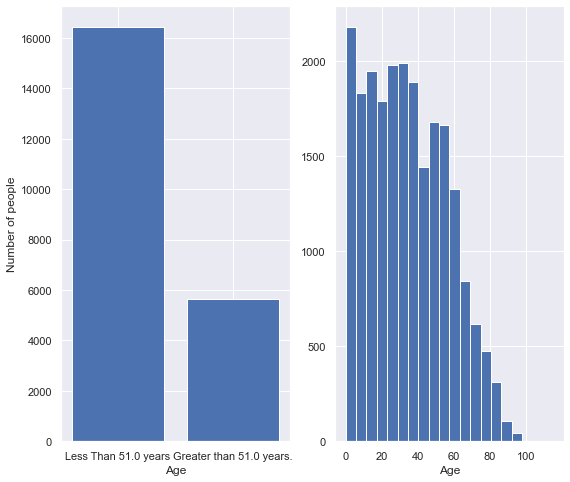

0.7436872115123541

In [7]:
#gettiig the 75th percentile age
centile =np.round( missed['Age'].quantile(0.75))
less = missed.query('Age < {}'.format(centile))['Age'].count()
grt = missed.query('Age >= {}'.format(centile))['Age'].count()

# plots
fig, a = plt.subplots(1,2, figsize=(9,8))
a[0].bar(['Less Than {} years'.format(centile), 'Greater than {} years.'.format(centile)], [less, grt])
a[0].set_xlabel('Age')
a[0].set_ylabel('Number of people')
a[1].hist(missed['Age'], bins=20)
a[1].set_xticks([0,20, 40,60,80, 100])
a[1].set_xlabel('Age')
plt.show()

#get proportions

prop_missed = less / missed.shape[0]
prop_missed

**Insight**
> About 74.37% of the patients who missed their appointment were less than 51 years of age especially between the age groups [-1 : 40]

> -1 *or* 0 is likely be the ages of newly born children



### Research Question 4 :Did patients miss their scheduled appointment due to not being enrolled in the Brazillian Welfare Program?

> In other to solve this question, i'll compare the number of patients who were granted scholarship but missed their appointment to those who were granted scholarship but didn't miss their appointment 

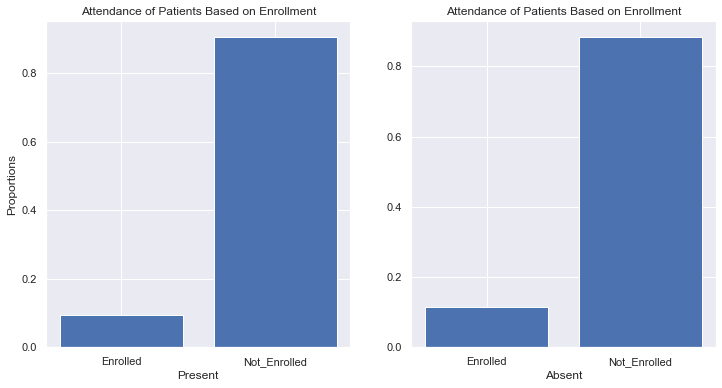

In [8]:
#Patients who were enrolled
enrolled = df.query('Scholarship == 1')
enrolled.drop('Scholarship', axis =1, inplace= True)
absent_enrolled = enrolled.query("'Yes' in No_show")
present_enrolled = enrolled.query("'No' in No_show")

#proportions
abs_enrolled = absent_enrolled.shape[0] / missed.shape[0]
pre_enrolled = present_enrolled.shape[0] / n_missed.shape[0]

#Patients who were not enrolled
not_enrolled = df.query('Scholarship == 0')
not_enrolled.drop('Scholarship', axis =1, inplace= True)
present_not_enrolled = not_enrolled.query("'No' in No_show")
absent_not_enrolled = not_enrolled.query("'Yes' in No_show")

#proportions
pre_not_enrolled =  present_not_enrolled.shape[0]/ n_missed.shape[0]
abs_not_enrolled = absent_not_enrolled.shape[0] / missed.shape[0]

#barplots
fig, a = plt.subplots(1,2, figsize=(12,6))
a[0].bar(['Enrolled', 'Not_Enrolled'], [pre_enrolled, pre_not_enrolled])
a[0].set_xlabel('Present') 
a[0].set_ylabel('Proportions')
a[0].set_title('')
a[1].bar(['Enrolled', 'Not_Enrolled'], [abs_enrolled, abs_not_enrolled])
a[1].set_xlabel('Absent')
a[0].set_title('Attendance of Patients Based on Enrollment')
a[1].set_title('Attendance of Patients Based on Enrollment')
plt.show()




**Insight**

> From the analysis, it shows that patients who didn't miss their appointments were mostly not enrolled in **The Brazillian Welfare Program**,  although most patients (about 88.43%)  who missed their appointments (as shown by the second plot) were not enrolled.
 


## Research Question 5 : Did patients miss their appointment due to not recieving an SMS?


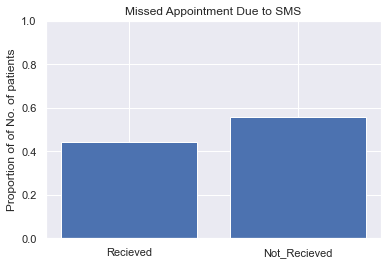

0.5572449995474703

In [9]:
# missed appointments 
recieved_sms = missed[missed['SMS_received'] == 1].shape[0]
n_recieved_sms = missed[missed['SMS_received'] == 0].shape[0]

#proportions
prop_re = recieved_sms / missed.shape[0]
prop_not = n_recieved_sms / missed.shape[0]

#plot

plt.ylim(0,1)
plot(['Recieved', 'Not_Recieved'], [prop_re,prop_not ], None, 'Proportion of of No. of patients', 'Missed Appointment Due to SMS', None)


prop_not

**Insight**
> A good number patients (about 55.7%) who missed their appointments were not contacted via SMS.

## Research Question 6 : Could the date of appointment be a cause for patients missing their appointment and how does it corelate with age groups?

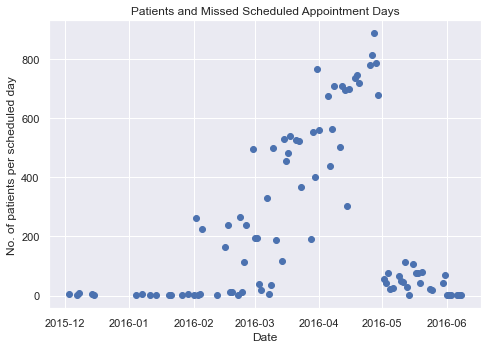

In [10]:
import datetime

#Get the number of patients per scheduled day
readings = []  
sort = missed['ScheduledDay'].value_counts() 
for i,v in enumerate(sort):
    readings.append(v)

#Get the scheduled dates and convert to datetime format.
date = missed['ScheduledDay']
events = pd.to_datetime( date.unique())

# scatter plot

def date_plot(x, y , x_label, y_label , title):

   # date handling
    months = mdates.MonthLocator()
    day = mdates.DayLocator()
    format = mdates.DateFormatter('%Y-%m')
    
  # main plot
    fig =  plt.figure()
    axes = fig.add_axes([0,0,1,1])
    axes.scatter(x, y)
    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_minor_locator(day)
    axes.xaxis.set_major_formatter(format)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_title(title)
    plt.show()

date_plot(events,readings,'Date','No. of patients per scheduled day','Patients and Missed Scheduled Appointment Days')


**Insight**
>  A large proportion of patients missed their appointment between the months of February and May. I'll check what age groups are associated with these months and compare.


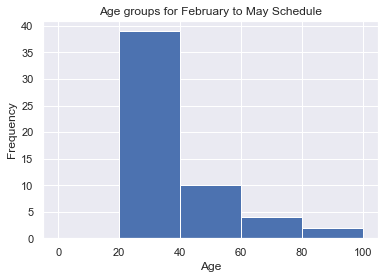

In [11]:
#ages associated with months

 #date slicing
d = missed[missed['ScheduledDay'] > '2016-02' ]
date_slice = d[d['ScheduledDay'] < '2016-05']

 # Get mean ages of each scheduled date
mean_ages = date_slice.groupby('ScheduledDay')['Age'].mean()
 #plot
mean_ages.plot(kind='hist', bins=[0,20,40,60,80,100])
plt.xlabel('Age')
plt.title('Age groups for February to May Schedule')
plt.show()

**Insight**

> The distribution shows that patients between the ages of 20 - 40 years missed their appointment the most between the months of February and May.

> It also shows that no patient below the age of 20years had an appointment during these months.

## Research Question 7: What's the relationship between age groups and other features?

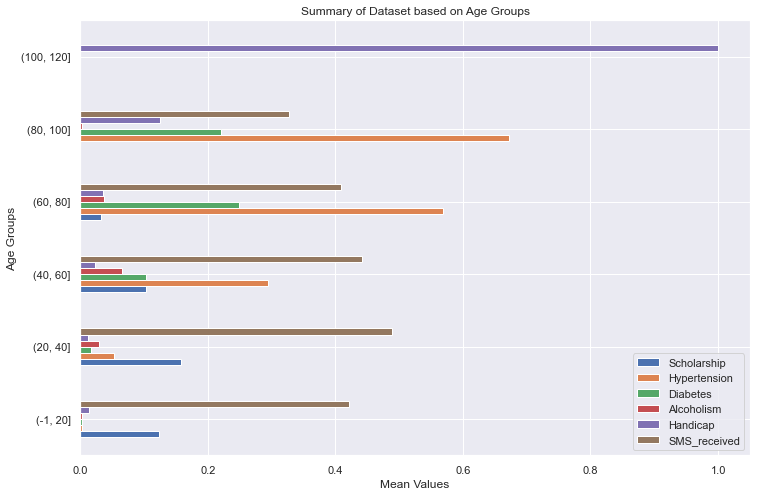

(-1, 20]      7042
(20, 40]      6551
(40, 60]      5528
(60, 80]      2517
(80, 100]      458
(100, 120]       2
Name: Age, dtype: int64

In [12]:
#make age groups using pd.cut()
age_groups = pd.cut(missed['Age'], bins=[-1,20,40,60,80,100,120])

#Group by age-groups and get the mean
ill = missed.groupby(age_groups).mean()

#Drop age column
ill.drop('Age', axis=1, inplace=True)

#plot
ill.plot(kind='barh', figsize = (12,8))
plt.ylabel('Age Groups')
plt.xlabel('Mean Values')
plt.title('Summary of Dataset based on Age Groups')
plt.show()

age_groups.value_counts()


**Insight**

> The plot shows that the average number of patients between the ages of 0 to 40 years had less illnesses compared to other age groups. They were the most contacted via SMS and also the most enrolled in the Brazillian Welfare Program.

> The plot also shows that the elderly age groups mostly were not enrolled in the Brazillian Welfare Program and also had high cases of Hypertension and Diabeties and a number of handicaps.



<a id='conclusions'></a>
## Conclusions

> 20.11% of patients missed their appointmnet of which 65.4% were females.

> Most patients suffered from Hypertension.

> About 74.4% of patients who missed their appointment were less than 51 years of age and most were between the ages of -1 to 40 years.

> From the analysis, it shows that patients who didn't miss their appointments were mostly not enrolled in The Brazillian Welfare Program, although most patients (about 88.43%) who missed their appointments were not enrolled.

> Most appointments between the Months of February and May were missed and are associated with age group 20 - 40 years.

> Illnessses such as hypertension ,diabeties and the handicapped were mostly associated with the elderly.

> Most patients who missed their appointment were not contacted via SMS.

> Factors such as Age, Scholarship enrollment, contact via SMS and whether or not a patient is ill can enable us predict if a patient will show up or not for appointments.

#### Limitations
> The dataset doesn't contain data of the patients location. This could have been analysed to see if distance could be a reason for missing appointments.

> The dataset contains no data whether a patient reached out to the hospital that he/she won't be available for the appointment. This would have helped a lot a getting factors that could make a patient missed his/her appointment.

> Weather/ Environmental conditons of unique dates are not included in the dataset.

**References**
> <a href='https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&ust=1532469042119000'>Bolsa Familia</a>